In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json
import requests

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [13]:
#To access authorised Spotify data
client_id = '0ae88ca7d87c4542bd2c73f49b2b1f2d'
client_secret = 'bfe64b6fa489434fa61e32adf856709b'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [56]:
def get_lyrics(artist, title):
    '''
    Get lyrics from "https://lyrics.ovh/" API given an artist and song title
    Return and unwanted characters are removed
    List return contains lyrics
    '''

    base_url = 'https://api.lyrics.ovh/v1/' + artist + '/' + title

    response = requests.get(base_url)
    status_code = response.status_code
    
    if status_code == 200:
        
        json_data = json.loads(response.content)
        lyrics = json_data['lyrics']
        # make all lyrics lower case
        lyrics = lyrics.lower()
        # Remove characters to isolate words
        unwanted_chars = ['\n', '\r', '(', ')', '[', ']', '.', '!', ',',
                          'chorus', 'verse', 'intro', 'outro',
                          'instrumental', 'guitar', 'solo', 'drums']

        cleaned_lyrics = []
        
        for line in lyrics:
            if line in unwanted_chars:
                # Put a space instead of unwanted characters
                cleaned_lyrics.append(' ')

            else:
                cleaned_lyrics.append(line)

        lyrics = ''.join(cleaned_lyrics)

        # Final filter of unwanted whitespace
        lyrics = ' '.join(lyrics.split())

        return lyrics

    elif status_code != 200:
        print(f'Status code {status_code}')

        return ''

In [62]:
lyrics = get_lyrics('Coldplay', 'Yellow')

In [63]:
lyrics

"look at the stars look how they shine for you and everything you do yeah they were all yellow i came along i wrote a song for you and all the things you do and it was called yellow so then i took my turn oh what a thing to have done and it was all yellow your skin oh yeah your skin and bones turn into something beautiful and you know you know i love you so you know i love you so i swam across i jumped across for you oh what a thing to do 'cos you were all yellow i drew a line i drew a line for you oh what a thing to do and it was all yellow and your skin oh yeah your skin and bones turn into something beautiful and you know for you i bleed myself dry for you i bleed myself dry it's true look how they shine for you look how they shine for you look how they shine for look how they shine for you look how they shine for you look how they shine look at the stars look how they shine for you and all the things that you do"

In [ ]:
def get_songs(artist_name):
    '''
    Given an artists name a list of all their songs are return
    Uses Spotify API
    '''
    #chosen artist
    result = sp.search(artist_name)

    # Initialise raw song list
    songs_list = []

    # List of unwanted strings to filter out
    # Risks removing intentional titles...
    UNWANTED_MATCHES = ['Live',
                        'Remaster',
                        'Remix',
                        'Mix',
                        'Acoustic',
                        'Instrumental',
                        'Take',
                        'Original',
                        '/']

    #search query
    #print(result['tracks']['items'][0]['artists'])

    #Artist's uri
    try:
        artist_uri = result['tracks']['items'][0]['artists'][0]['uri']
    except:
        print(f'Sorry, {artist_name} did not return any search results.')
    else:
        # All of the Artist's albums
        sp_albums = sp.artist_albums(artist_uri, album_type='album')

        # Album uris list
        album_uris = []

        for i in range(len(sp_albums['items'])):
            album_uris.append(sp_albums['items'][i]['uri'])

        # Get songs from albums and put into list
        # Nested loop through album uris and get song name in each album
        for album in range(len(album_uris)):

            album_songs = sp.album_tracks(album_uris[album])['items']

            for songs in range(len(album_songs)):
                song = album_songs[songs]['name']

                if any(string in song for string in UNWANTED_MATCHES):
                    continue
                
                songs_list.append(song)

    finally:
        # Filter potential repetittions 
        unique_songs = np.unique(songs_list)

    return unique_songs

In [1]:
def preprocess_lyrics(df, column):
    '''
    Function to count lyrics word length, unique length 
    and unique index
    '''
    df = df.copy(deep=True)
    
    split = df[column].str.split()
    df[column + '_count'] = split.str.len()
    
    unique_lyrics_len = []
    
    for i in split:
        unique = np.unique(i)
        unique_length = len(unique)
        unique_lyrics_len.append(unique_length)

    df[column+'_unique_count'] = unique_lyrics_len

    unique_ratio = df[column+'_unique_count'] / df[column + '_count']
    df['unique_ratio'] = unique_ratio.round(3)
    
    return(df)



In [ ]:
df = preprocess_lyrics(df, 'lyrics')

df

In [2]:
def lyrics_hist(df, column, category):
    '''
    function takes df column to plot histogram
    for a given category e.g. artist or albums
    '''
    
    sns.histplot(data=df,
                 x=column,
                 hue=category,
                 kde=True,
                 common_norm=False)
    
    plt.show()

In [ ]:
lyrics_hist(df, df.lyrics_unique_count, df.artist)

In [3]:
def make_wordcloud(lyrics):
    '''
    Given song lyrics, produce a wordcloud 
    '''
    lyrics = lyrics.split()
    word_str = ' '.join(lyrics)

    wordcloud = WordCloud(width = 600,
                          height = 600,
                          background_color ='white',
                          stopwords = STOPWORDS,
                          min_font_size = 10,
                          collocations = False
                          ).generate(word_str)

    plt.figure(figsize = (6, 6), facecolor = None)

    plt.imshow(wordcloud)
    plt.axis("off")
    
    plt.tight_layout(pad = 0)

    plt.show()

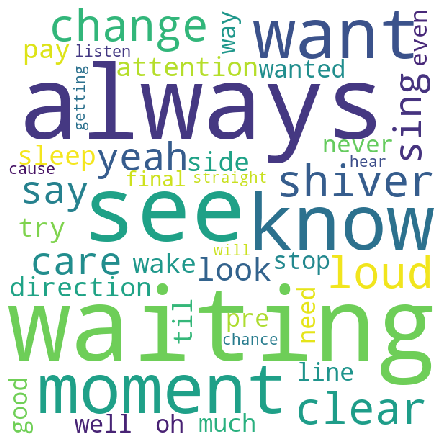

In [221]:
rand = df.sample()
artist = rand.artist.item()
song = rand.title.item()
lyrics = rand.lyrics.item()
make_wordcloud(lyrics)


In [36]:
result = sp.search('coldplay')

In [55]:
len(result['tracks']['items'])

10

KeyError: 'track'